<a href="https://colab.research.google.com/github/leabizbille/ProjetIOT/blob/main/Home_ToursHabitat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install summarytools -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.4 MB/s eta 0:00:00


In [2]:
!pip install pygwalker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 30.2 MB/s eta 0:00:00


In [3]:
pip install sweetviz -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 41.6 MB/s eta 0:00:00


In [4]:
import pygwalker as pyg
from summarytools import dfSummary # module pandas-profiling
import pandas as pd
import sweetviz as sv # Module pour faire le rapport HTML
import missingno as msno

In [7]:
# Charger les fichiers CSV en conservant les titres des colonnes
THabitat2023 = pd.read_csv("/content/Tours Habitat_2023.csv",sep= ";", parse_dates=[0], dayfirst=True)
THabitat2024= pd.read_csv("/content/Tours Habitat_2024.csv",sep= ";", parse_dates=[0], dayfirst=True)

<Axes: >

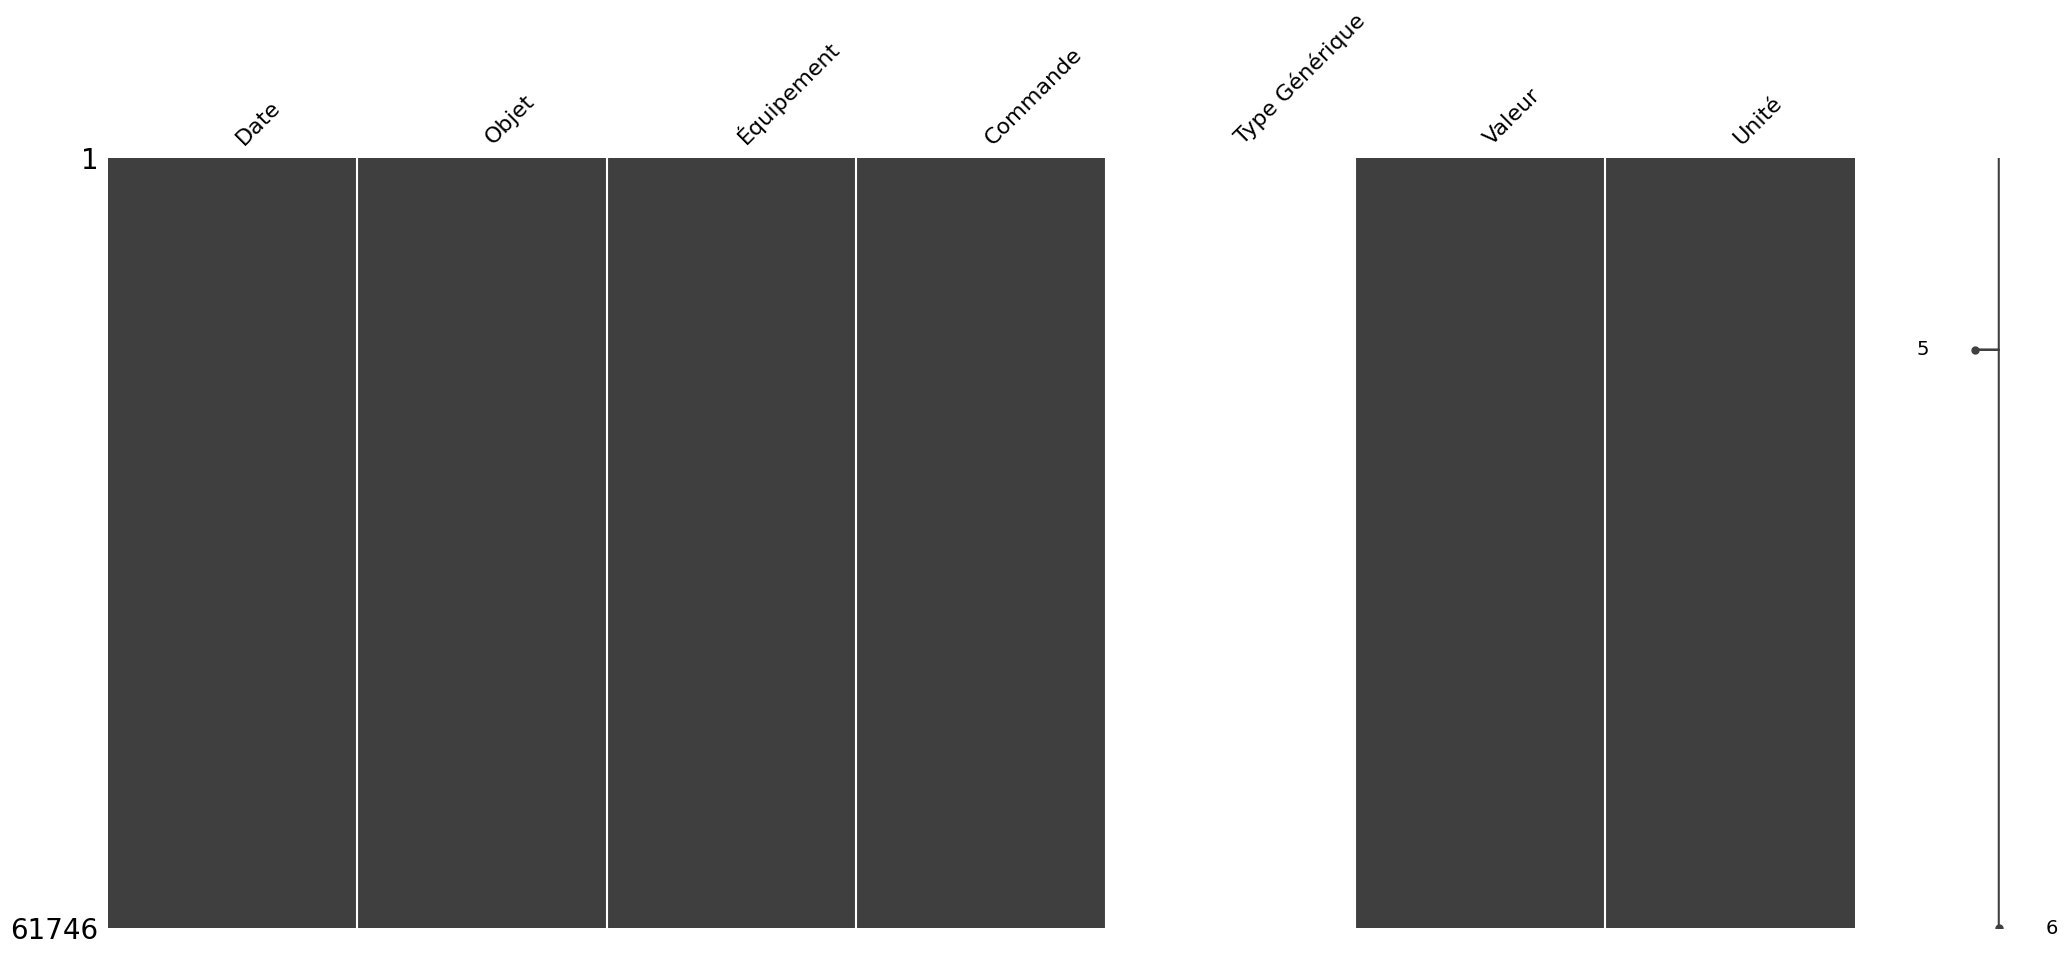

In [8]:
msno.matrix(THabitat2023)

<Axes: >

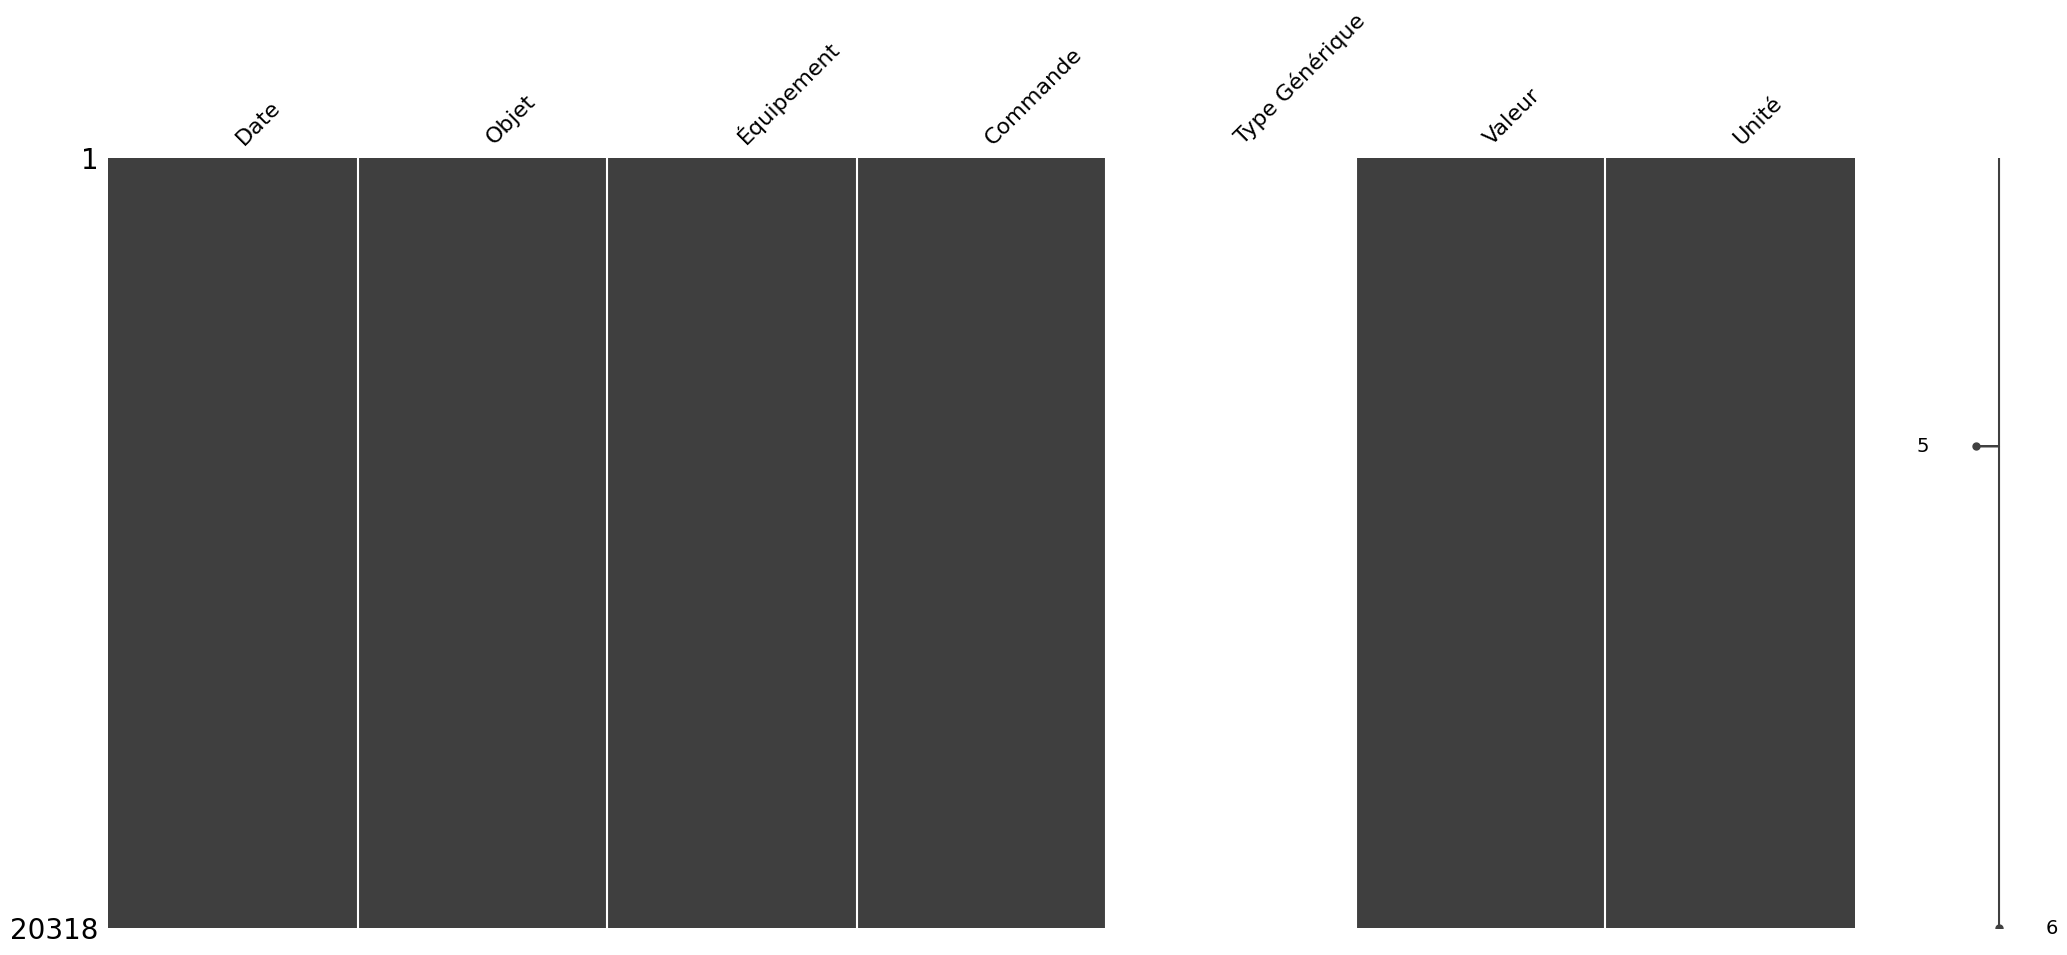

In [9]:
msno.matrix(THabitat2024)

In [10]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(THabitat2024)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 2024-01-24 16:22:052. 2024-01-10 19:00:063. 2024-04-10 10:00:054. 2024-04-30 19:00:065. 2024-05-04 15:00:056. 2024-01-12 09:00:067. 2024-01-17 12:00:058. 2024-05-09 10:00:059. 2024-05-03 17:00:0510. 2024-04-22 10:00:0611. other,"10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)9 (0.0%)9 (0.0%)9 (0.0%)9 (0.0%)9 (0.0%)20,223 (99.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",0(0.0%)
2,Objet[object],1. Données calculées,"20,318 (100.0%)",,0(0.0%)
3,Équipement[object],1. Conso horaire 1er Etage_1204092. Conso horaire RDC_120404_FCH3. Conso horaire RDC_12044B_FCH4. Conso horaire E2_120417_FCH5. Conso horaire RDC_12044E_FCH,"7,604 (37.4%)4,962 (24.4%)4,063 (20.0%)2,311 (11.4%)1,378 (6.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACSUlEQVR4nO3bQW6bQACF4aFCUbMBWZZ8GB+ih+0huI1lmUUTZUMX3Sd2DG8ofN8JxtIvrEG8ZpqmAgk/ah+A/RAbMWIjpimlvJZSXmofJOBjmqa32ofYs/Z4PP7quu5Q+yBLG8fx2jTNb8HV03Zddzifz29937/XPsxSbrfbz2EYDpfL5aWUIrZK2lJK6fv+/XQ6/al9mIW91j7A3rkgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxbSn/PsGpfZAlbf33/S/acRyvwzAcysY/wRnH8VpK+ah9jj3zWTgxjd0oKS4IxKz5b9Tf3sasdl1lDbU9q1xXWUNt05rXVZt+FbNHLgjEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERswq11VrOw/zWO26yhpqe3wWTox1FTEuCMTU/hv1V7kjVddVFlT7Um1dZUG1P7XXVat63cKyXBCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhq6yoLqv2puq6yoNoXn4UTY11FzJxPNk8pPjXb4MV4ha/MMngxXuEecw5ejFf4lJe6xIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IiZZV1lKcU9ZltXWUrxFRsEYqyriHn0yebpxbc9tK6yoOIZd6+rLKh41qPrKgsqvs1LXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzE3L2usqDiWQ+tqyyoeIYNAjHWVcS4IBAjNmL+Ajt1DjeuknBbAAAAAElFTkSuQmCC"">",0(0.0%)
4,Commande[object],1. Conso E2 Tableau Général2. Conso E1 Tableau général3. Conso E1 Bureaux4. Conso E1 Eclairage5. Conso E1 Circulation6. Conso RDC Armoire37. Conso RDC Armoire58. Conso RDC VMC Ateliers9. Conso RDC Armoire110. Conso RDC Tab Lumières Général11. other,"2,310 (11.4%)2,228 (11.0%)2,009 (9.9%)1,698 (8.4%)1,395 (6.9%)1,251 (6.2%)1,243 (6.1%)1,242 (6.1%)1,226 (6.0%)1,019 (5.0%)4,697 (23.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEHUlEQVR4nO3dQW7bVgBFUaoQgmYiwTDgxXgRXWwXod0YhjVIgkzUQadt9MnP3gbKOXMTGlx8gQSfdbjdbgsUfvu/PwC/DrGRERsZsZERGxmxkREbGbGRERuZw7Isn5dl+bTDtb7fbrevO1yHB3V8fn7+43Q6Pc1e6Hq9vh8Ohz8Fx785nk6np9fX16/n8/nb1ot8fHz8frlcnt7e3j4tyyI2/tFxWZblfD5/e3l5+TJ5rc87fB4emBsEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIy

In [11]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(THabitat2024)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 2024-01-24 16:22:052. 2024-01-10 19:00:063. 2024-04-10 10:00:054. 2024-04-30 19:00:065. 2024-05-04 15:00:056. 2024-01-12 09:00:067. 2024-01-17 12:00:058. 2024-05-09 10:00:059. 2024-05-03 17:00:0510. 2024-04-22 10:00:0611. other,"10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)9 (0.0%)9 (0.0%)9 (0.0%)9 (0.0%)9 (0.0%)20,223 (99.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",0(0.0%)
2,Objet[object],1. Données calculées,"20,318 (100.0%)",,0(0.0%)
3,Équipement[object],1. Conso horaire 1er Etage_1204092. Conso horaire RDC_120404_FCH3. Conso horaire RDC_12044B_FCH4. Conso horaire E2_120417_FCH5. Conso horaire RDC_12044E_FCH,"7,604 (37.4%)4,962 (24.4%)4,063 (20.0%)2,311 (11.4%)1,378 (6.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACSUlEQVR4nO3bQW6bQACF4aFCUbMBWZZ8GB+ih+0huI1lmUUTZUMX3Sd2DG8ofN8JxtIvrEG8ZpqmAgk/ah+A/RAbMWIjpimlvJZSXmofJOBjmqa32ofYs/Z4PP7quu5Q+yBLG8fx2jTNb8HV03Zddzifz29937/XPsxSbrfbz2EYDpfL5aWUIrZK2lJK6fv+/XQ6/al9mIW91j7A3rkgECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxbSn/PsGpfZAlbf33/S/acRyvwzAcysY/wRnH8VpK+ah9jj3zWTgxjd0oKS4IxKz5b9Tf3sasdl1lDbU9q1xXWUNt05rXVZt+FbNHLgjEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERswq11VrOw/zWO26yhpqe3wWTox1FTEuCMTU/hv1V7kjVddVFlT7Um1dZUG1P7XXVat63cKyXBCIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjZhq6yoLqv2puq6yoNoXn4UTY11FzJxPNk8pPjXb4MV4ha/MMngxXuEecw5ejFf4lJe6xIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IiZZV1lKcU9ZltXWUrxFRsEYqyriHn0yebpxbc9tK6yoOIZd6+rLKh41qPrKgsqvs1LXWLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzE3L2usqDiWQ+tqyyoeIYNAjHWVcS4IBAjNmL+Ajt1DjeuknBbAAAAAElFTkSuQmCC"">",0(0.0%)
4,Commande[object],1. Conso E2 Tableau Général2. Conso E1 Tableau général3. Conso E1 Bureaux4. Conso E1 Eclairage5. Conso E1 Circulation6. Conso RDC Armoire37. Conso RDC Armoire58. Conso RDC VMC Ateliers9. Conso RDC Armoire110. Conso RDC Tab Lumières Général11. other,"2,310 (11.4%)2,228 (11.0%)2,009 (9.9%)1,698 (8.4%)1,395 (6.9%)1,251 (6.2%)1,243 (6.1%)1,242 (6.1%)1,226 (6.0%)1,019 (5.0%)4,697 (23.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEHUlEQVR4nO3dQW7bVgBFUaoQgmYiwTDgxXgRXWwXod0YhjVIgkzUQadt9MnP3gbKOXMTGlx8gQSfdbjdbgsUfvu/PwC/DrGRERsZsZERGxmxkREbGbGRERuZw7Isn5dl+bTDtb7fbrevO1yHB3V8fn7+43Q6Pc1e6Hq9vh8Ohz8Fx785nk6np9fX16/n8/nb1ot8fHz8frlcnt7e3j4tyyI2/tFxWZblfD5/e3l5+TJ5rc87fB4emBsEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIy

- 1 nan dans les Unités -> regarder pour faire des modifications
- 100 % de donnée manquante dans "Type Générique".
- Deux fichiers sous le même format

Pour toutes les colonnes, reformater les données.
Un pivotement ou une transposition du tableau sera probablement nécessaire.

Fusionner les deux tableaux.


In [26]:
# Fusionner les deux DataFrames
Tours_Habitat= pd.concat([THabitat2023, THabitat2024], ignore_index=True)

# Sauvegarder le fichier fusionné si nécessaire
Tours_Habitat.to_csv('Tours_Habitat_fusionne.csv', index=False)

In [27]:
# Séparer la colonne 'datetime' en deux colonnes distinctes
Tours_Habitat[['date', 'time']] = Tours_Habitat['Date'].str.split(' ', expand=True)

# Convertir les nouvelles colonnes au format datetime
Tours_Habitat['date'] = pd.to_datetime(Tours_Habitat['date'], format='%Y-%m-%d')
Tours_Habitat['annee'] = pd.to_datetime(Tours_Habitat['date']).dt.year
Tours_Habitat['time'] = pd.to_datetime(Tours_Habitat['time'], format='%H:%M:%S').dt.time

In [56]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(Tours_Habitat)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[object],1. 2023-01-01 14:15:002. 2023-01-07 21:00:003. 2023-01-07 22:00:004. 2023-08-03 02:00:055. 2023-05-20 15:00:056. 2023-04-30 18:00:057. 2023-06-19 16:00:058. 2023-04-28 18:00:059. 2023-05-10 16:00:0510. 2023-08-09 19:00:0511. other,"17 (0.0%)13 (0.0%)13 (0.0%)11 (0.0%)11 (0.0%)11 (0.0%)11 (0.0%)10 (0.0%)10 (0.0%)10 (0.0%)81,947 (99.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADLklEQVR4nO3cwY3TYBRG0ecogmFja2QpJUAPKYItvdOFNzCswoIeriVzTgX/4kpPkfxleb1eA4Xb2Q/g/yE2MmIjIzYyYiMjNjJiIyM2MmIjIzYyt2VZvi3L8nb2Q7i+28x8nZnPZz+E63NGyYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MbWZ+zsyfsx/C9S3+xYiKM0pGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEZGbGSsq8hYV5FxRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGYMXMgYvZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuOMkhEbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyBi9kDF7IOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKBmxkREbGesqMtZVZJxRMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkrKvIOKNkxEbG4IWMwQsZZ5SM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzLOKJllZr7MzKezH8L13fd9/76u6/vZD+H67uu6vj+fz9/btn2c/Riu6ziOt/vMzLZtH4/H49fZD+La/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjc5/59/nH2Q/h2o7jeFv2ff/h40kKPgsnY11Fxg8EMmIjIzYyYiMjNjJiIyM2MmIjIzYyfwFj50uCzHpkKgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Équipement[object],1. 1er Etage_120409_FCH2. RDC_120404_FCH3. RDC_12044B_FCH4. RDC_12044E_FCH5. E2_120417_FCH,"22,979 (28.0%)18,161 (22.1%)17,502 (21.3%)13,261 (16.2%)10,161 (12.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACRElEQVR4nO3bQW7aUBiF0d8VipqJLYTEYlhEF9tFeDcI4UETZeIOqgwDiLjXBp+zAd7gk62HfJtxHAsSfsx9ANZDbMSIjZimql6r6mXug9zoYxzHt7kPwX02u93uV9u227kPcothGE5N0/wW3GPatG27PRwOb13Xvc99mEvO5/PPvu+3x+PxparE9oA2VVVd173v9/s/cx/mBq9zH4D7uSAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzGbqn+f78x9kGse4YxcthmG4dT3/bYe4POdYRhOVfUx9zm4j8/CiWnsRklxQSBmSa9Rr8gnt5h1leXU81vEuspyah2WtK5a/F8vfI8LAjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERs4h11dy/T8Zi1lWWU8/PZ+HEWFcR44JAzFJeo16hK7CIdZVl1TrMvq6yrFqPpayrLKtWwAWBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IiZfV1lWbUei1hXWVatg8/CibGuIib1ZPPkIjN4MWihKjB4MWjhU2rwYtCCP3XJERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEfPf11XWU3yKrKusp6iyQSDIuoqYqZ9snmB8adJ1lRUVl0y2rrKi4pqp11VWVHzJn7rEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiJlsXWVFxTWTrqusqLjEBoEY6ypiXBCIERsxfwFS/A43vegINQAAAABJRU5ErkJggg=="">",0(0.0%)
3,Commande[object],1. E2 Tableau Général2. E1 Tableau général3. E1 Bureaux4. RDC Armoire35. RDC Armoire56. RDC Armoire17. E1 Eclairage8. RDC S1 cafétériat9. E1 Circulation10. RDC TD Chauffage11. other,"10,153 (12.4%)6,455 (7.9%)5,993 (7.3%)5,332 (6.5%)5,328 (6.5%)5,289 (6.4%)5,169 (6.3%)4,959 (6.0%)4,686 (5.7%)4,535 (5.5%)24,165 (29.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD3klEQVR4nO3cQWrbUABF0e9iSjuxCYEsJovoYrsI7yaEaNCGTNxBhy1EssStnZ6zAJHB5RuJ/7I7n88DCp/+9R/A/0NsZMRGRmxkxEZGbGTERkZsZMRGZjfG+DrG+LzR897O5/PPjZ7FB7O/v7//djgc7rZ42DRNz7vd7rvg+Jv94XC4e3x8/Hk8Hl/XPOjl5eXL6XS6e3p6+jzGEBt/2I8xxvF4fH14ePixwfO+bvAMPigvCGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmY/xu+7aGsftMUz+Nj20zQ9n06nu7HBXbRpmp7HGG/r/yw+IhsEMjv/MovKJSeb04uLLF5XWVBxqUXrKgsq1rhkXWVBxUV81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiOzaPBi1MIaiwcvRi1cyrVwMgYvZJaebE41LrZo8GLswhqzBy/GLqy1dPBi7MLFfNQlIzYyYiMjNjJ

In [29]:
# Supprimer l'ancienne colonne si elle n'est plus nécessaire
Tours_Habitat= Tours_Habitat.drop(columns=['Type Générique'])
Tours_Habitat= Tours_Habitat.drop(columns=['Objet'])

In [40]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = Tours_Habitat['Équipement'].unique()

# Afficher les modalités
print(modalites)

['1er Etage_120409_FCH' 'E2_120417_FCH' 'RDC_120404_FCH' 'RDC_12044B_FCH'
 'RDC_12044E_FCH']


In [39]:
# Supprimer "Conso horaire" et séparer les informations autour du "_"
Tours_Habitat['Équipement'] = Tours_Habitat['Équipement'].str.replace('Conso horaire ', '', regex=False)

In [36]:
Tours_Habitat[['Niveau', 'Num_Piece', 'FCH']] = Tours_Habitat['Équipement'].str.split('_', expand=True)

Nettoyage colonne Commande :

In [55]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = Tours_Habitat['Commande'].unique()

# Afficher les modalités
print(modalites)

[' E1 Bureaux' ' E1 Circulation' ' E1 Eclairage' ' E1 Seche Main F'
 ' E1 Seche Main H' ' E1 Tableau général' ' E2 Coffret'
 ' E2 Tableau Général' ' RDC Armoire1' ' RDC Armoire3' ' RDC Armoire5'
 ' RDC VMC Ateliers' ' RDC Bureau S6' ' RDC Climatisation'
 ' RDC Sous-station' ' RDC Tab Lumières Général' ' RDC Ascenseur'
 ' RDC Rideau d’air chaud' ' RDC S1 cafétériat' ' RDC TD Chauffage']


In [45]:
# Supprimer "Conso"
Tours_Habitat['Commande'] = Tours_Habitat['Commande'].str.replace('Conso', '', regex=False)

In [51]:
Tours_Habitat['Commande'] = Tours_Habitat['Commande'].astype(str)

In [54]:
# Séparer les valeurs avant et après le premier espace
Tours_Habitat[['Etage', 'Objets']] = Tours_Habitat['Commande'].str.split(n=1, expand=True)

In [ ]:
# Supprimer l'ancienne colonne si elle n'est plus nécessaire
Tours_Habitat= Tours_Habitat.drop(columns=['FCH'])
Tours_Habitat= Tours_Habitat.drop(columns=['Niveau'])

In [ ]:
# Extraction des informations dans de nouvelles colonnes
val_roland['Logement'] = val_roland['Objet'].str.extract(r'(LOGEMENT\d+)')
val_roland['Replicat'] = val_roland['Objet'].str.extract(r'-\s([AB])')
val_roland['Pilote'] = val_roland['Objet'].str.contains(r'\(piloté\)').map({True: 'piloté', False: 'non piloté'})

# Supprimer l'ancienne colonne
val_roland= val_roland.drop(columns=['Objet'])

In [ ]:
# Remplacer les valeurs avec "_" par ce qui se trouve après, sinon garder la valeur intacte
val_roland['Équipement'] = val_roland['Équipement'].str.split('_').str[1].fillna(val_roland['Équipement'])
val_roland['Équipement'] = val_roland['Équipement'].str.split(' - ').str[1].fillna(val_roland['Équipement'])


In [ ]:
# Fonction de nettoyage
def nettoyer_equipement(data):
    data = data.strip()  # Supprime les espaces au début et à la fin
    if data.startswith('WIFITIC'):  # Vérifie si le texte commence par "WIFITIC"
        return 'Conso_Total_index'
    if data.startswith('Thermostat'):
        return 'Thermostat'
    if data.startswith('TEMP'): # Changement de nom et clarifie
        return 'Thermostat'
    elif data == 'Conso ':  # Nettoie "Conso " avec un espace
        return 'Conso'
    elif data == 'Conso': # Changement de nom
        return 'Conso_horaire'
    elif data == 'occupation':  # Clarifie
        return 'Occupation_Aujourdhui'
    elif data == 'arrivée du jour':  # Clarifie
        return 'Occupation_Hier'
    else:
        return data  # Conserve les autres modalités intactes

# Appliquer la fonction de nettoyage à la colonne Equipement
val_roland['Équipement'] = val_roland['Équipement'].apply(nettoyer_equipement)

AttributeError: 'float' object has no attribute 'strip'

In [ ]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = val_roland['Équipement'].unique()

# Afficher les modalités
print(modalites)

['Occupation_Hier' 'Conso_horaire' 'Occupation_Aujourdhui' '4PM'
 'Thermostat' 'Conso_Total_index']


* Attention au 4 PM qui correspond à beaucoup de chose !

In [ ]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = val_roland['Commande'].unique()

# Afficher les modalités
print(modalites)

['Etat arrivée du jour' 'Conso_Heure_B001' 'Etat occupation'
 '0 - CHAUFFAGE Etat ' '0 - CHAUFFAGE instantané' '0 - CHAUFFAGE total'
 '1 - ECS Etat ' '2 - Prise Etat ' 'Température' 'Consigne' 'index'
 'Conso_Heure_B002' 'Sw 1 Etat ' 'Sw 2 Etat ' 'Conso_Heure_A301'
 'Conso_Heure_A302']


In [ ]:
# Fonction de nettoyage
def nettoyer_commande(data):
    data = data.strip()  # Supprime les espaces au début et à la fin
    if data.startswith('Conso_Heure'):  # Vérifie si le texte commence par Conso_Heure
        return 'Conso_Total_kw/h'
    if data.startswith('0 - CHAUFFAGE Etat'):
        return 'Chauffage_OnOff'
    if data.startswith('0 - CHAUFFAGE instantané'): # Changement de nom et clarifie
        return 'Chauffage_Conso'
    elif data == '0 - CHAUFFAGE total':  # Nettoie "Conso " avec un espace
        return 'Chauffage_Conso_Total'
    elif data == '1 - ECS Etat': # Changement de nom
        return 'Ballon_OnOff'
    elif data == '2 - Prise Etat': # Changement de nom
        return 'TV-Frigo_OnOff'
    elif data == 'Consigne': # Changement de nom
        return 'TemperatureDesiree'
    elif data == 'Température': # Changement de nom
        return 'TemperatureReelle'
    elif data == 'index': # Changement de nom
        return 'TIC_enedis'
    elif data == 'Température': # Changement de nom
        return 'TemperatureReelle'
    elif data == 'Sw 1 Etat': # Changement de nom
        return 'Ballon_OnOff'
    elif data == 'Sw 2 Etat': # Changement de nom
        return 'TV-Frigo_OnOff'
    elif data == 'Etat occupation':  # Clarifie
        return 'Presence_absence'
    elif data == 'Etat arrivée du jour':  # Clarifie
        return 'Presence_absence'
    else:
        return data  # Conserve les autres modalités intactes

# Appliquer la fonction de nettoyage à la colonne Equipement
val_roland['Commande'] = val_roland['Commande'].apply(nettoyer_commande)

AttributeError: 'float' object has no attribute 'strip'

In [ ]:
# Trouver toutes les modalités uniques dans la colonne 'Équipement'
modalites = val_roland['Commande'].unique()

# Afficher les modalités
print(modalites)

['Presence_absence' 'Conso_Total_kw/h' 'Chauffage_OnOff' 'Chauffage_Conso'
 'Chauffage_Conso_Total' 'Ballon_OnOff' 'TV-Frigo_OnOff'
 'TemperatureReelle' 'TemperatureDesiree' 'TIC_enedis']


Mettre "Index" comme unité, si TIC enedis dans la colonne commande.

In [ ]:
# Mettre "index" dans la colonne 'Unité' si "index" est dans la colonne 'Commande', sinon garder la valeur existante
val_roland['Unité'] = val_roland.apply(lambda row: 'Oui-Non' if 'Presence_absence' in row['Commande'] and pd.isna(row['Unité']) else row['Unité'], axis=1)

Mettre "ON-Off" comme unité, si la ligne correspond à un object Allumé ou éteint.

In [ ]:
# Mettre "On-Off" dans la colonne 'Unité' si " ... " est dans la colonne 'Commande', sinon garder la valeur existante
val_roland['Unité'] = val_roland.apply(lambda row: 'On-Off' if 'Chauffage_OnOff' in row['Commande'] and pd.isna(row['Unité']) else row['Unité'], axis=1)
val_roland['Unité'] = val_roland.apply(lambda row: 'On-Off' if 'Ballon_OnOff' in row['Commande'] and pd.isna(row['Unité']) else row['Unité'], axis=1)
val_roland['Unité'] = val_roland.apply(lambda row: 'On-Off' if 'TV-Frigo_OnOff' in row['Commande'] and pd.isna(row['Unité']) else row['Unité'], axis=1)

In [ ]:
# Mettre "Oui-Non" dans la colonne 'Unité' si "Presence humaine" est dans la colonne 'Commande', sinon garder la valeur existante
val_roland['Unité'] = val_roland.apply(lambda row: 'On-Off' if 'Chauffage_OnOff' in row['Commande'] and pd.isna(row['Unité']) else row['Unité'], axis=1)

Verification du nombre de valeur NA

In [ ]:
print(val_roland.isna().sum())

Équipement            0
Commande              0
Type Générique    42868
Valeur                0
Unité                 0
date                  0
time                  0
Logement              0
Lettre                0
Pilote                0
dtype: int64


<Axes: >

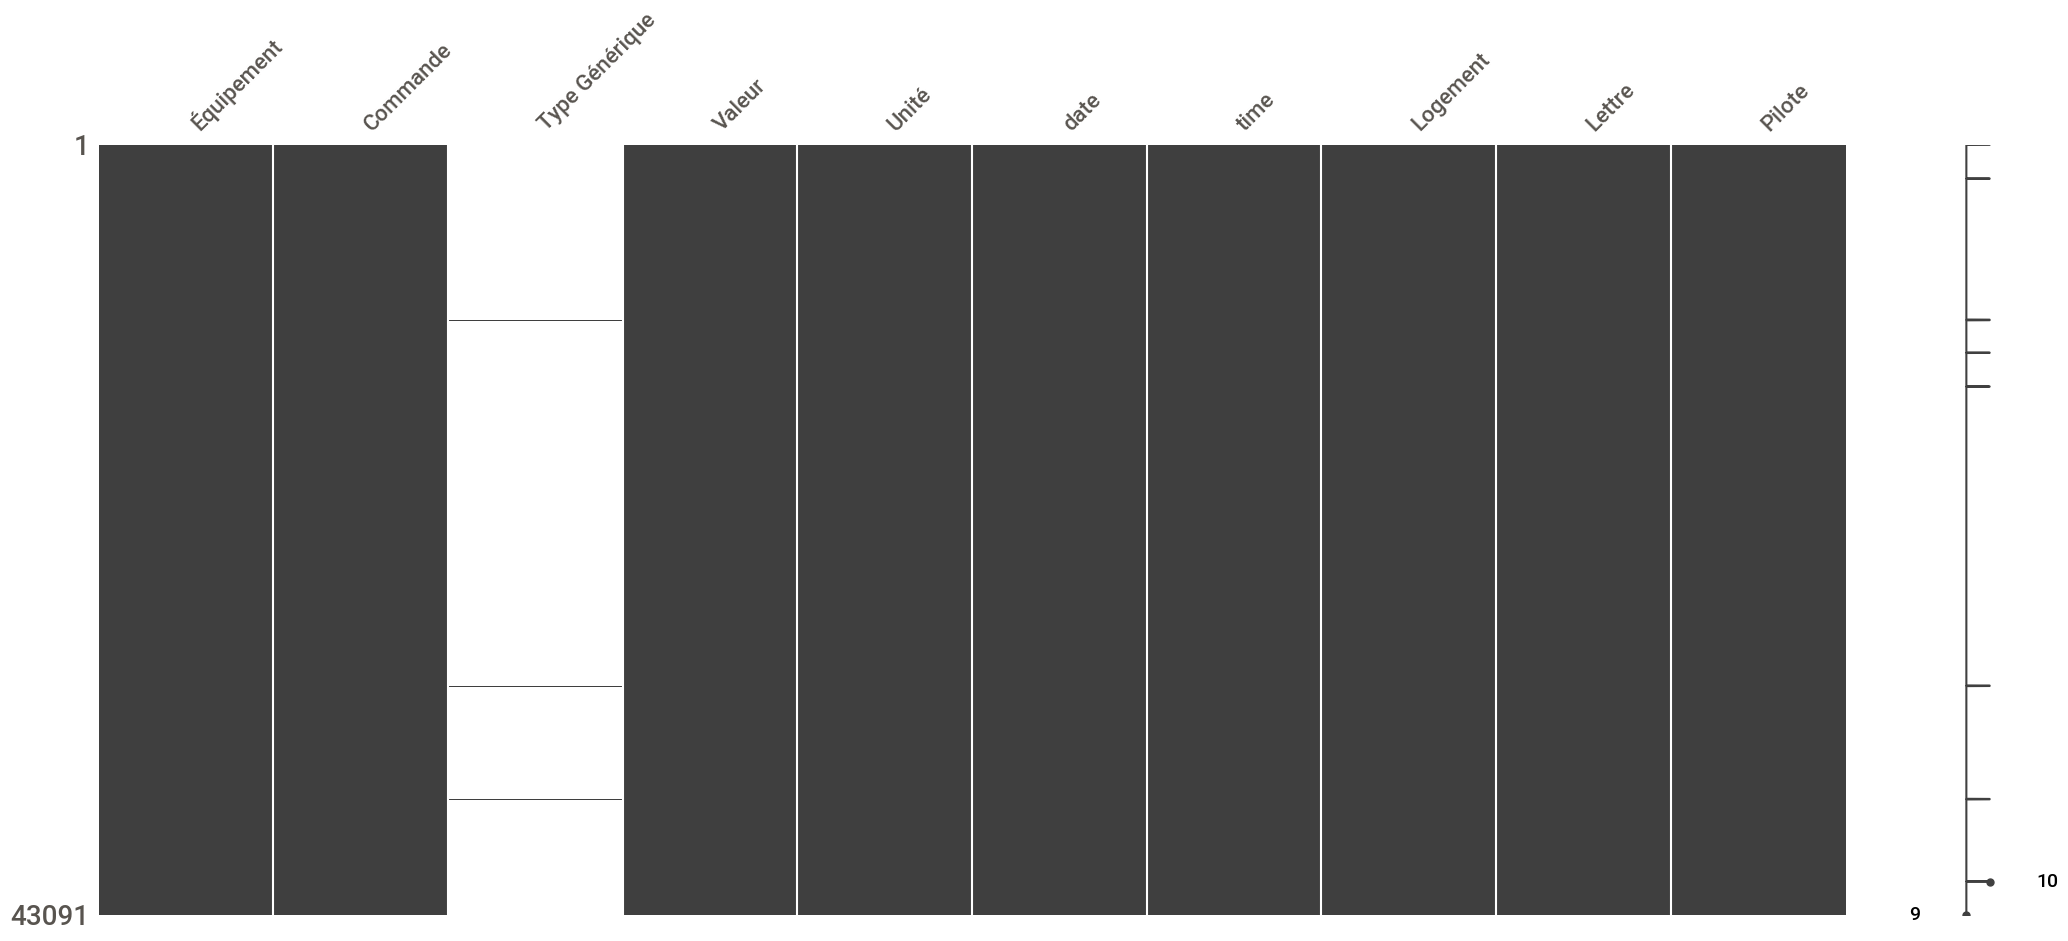

In [ ]:
msno.matrix(val_roland)

In [ ]:
# Description pour comprendre les données et mettre en suite le tableau en forme
dfSummary(val_roland)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Équipement[object],1. Conso_Total_index2. Thermostat3. Conso_horaire4. Chauffage5. Ballon_Eau6. Occupation_Hier7. TV-Frigo8. Occupation_Aujourdhui,"19,261 (44.7%)10,942 (25.4%)7,486 (17.4%)4,992 (11.6%)116 (0.3%)109 (0.3%)98 (0.2%)87 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAC4CAYAAAD0WZ4UAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADA0lEQVR4nO3cQUocUQBF0V/SmGTSjQguIdmDi8his4heRPYgYg2icdIZBDIKUUh7qyjPWcFHLvWppp7T6XQaULhY+gC8H2IjIzYyYiMjNjJiIzONMT6NMS6XPsjKPJ9Op8elD7E1u+vr66/7/f5q6YOsyTzP99M0fRPcee32+/3V7e3t4+FweFr6MGvw8PDw8Xg8Xt3d3V2OMcR2RrsxxjgcDk83Nzc/lj7Minxa+gBb5AWBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzG6M35/VLH2QtfC3eDu7eZ7vj8fj1fBZzR/zPN+PMZ6XPsfW+Cz873wW/gYm/36BytqfbJ4wG7LqwYvhybasdvBieLI9ax+8eEPeED/qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVnt4GWNZ+L/rHrwYniyLT4LJ2PwQsYLApn6GnUtvmPpuspa6n3L1lXWUtTrqtX9vELHCwIZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERuZbF1lLUW6rrKWet98Fk7GuorMOZ9snlr809kGL8YsvOQsgxdjFl7jnIMXYxb+yY+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZM4yeDFm4TXONngxZuElPgsnY/BCxgsCGbGRuZim6cs0Td4meXMXY4zPY4wPSx+E7XONkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRuRhjfB9j/Fz6IGyfwQsZ1ygZsZExeCFj8ELGNUpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZKyryFhXkXGNkhEbGesqMtZVZFyjZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcY2SERsZgxcyBi9kXKNkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnXKBmxkREbGbGRERsZsZH5Bb057jWeTR8NAAAAAElFTkSuQmCC"">",0(0.0%)
2,Commande[object],1. TIC_enedis2. TemperatureReelle3. Conso_Total_kw/h4. Chauffage_Conso5. Chauffage_Conso_Total6. Chauffage_OnOff7. Presence_absence8. Ballon_OnOff9. TV-Frigo_OnOff10. TemperatureDesiree,"19,261 (44.7%)10,872 (25.2%)7,486 (17.4%)1,936 (4.5%)1,629 (3.8%)1,427 (3.3%)196 (0.5%)116 (0.3%)98 (0.2%)70 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD00lEQVR4nO3dwW3bZgCG4Z+GkDYXCYYAj9Du4CEybIfQEN3BMKxDk+aiHpL2Ess5lHxJyM8zwQ/jBWkS/OzpcrkMKNytfQDeD7GRERsZsZERGxmxkREbGbGRERuZaYzxcYzxYe2DbMzXy+Xyee1D3Jrd8Xj8tN/v79c+yJacz+fnaZr+ENy8dvv9/v7x8fHz4XD4svZhtuDl5eXX0+l0//T09GGMIbYZ7cYY43A4fHl4ePhr7cNsyMe1D3CLPCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR2Y3x7bOatQ+yFX4Wy9mdz+fn0+l0P3xW85/z+fw8xvi69jlujc/CX+ez8AVM/ooRla1f2VxhbsimBy+GJ7dls4MXw5Pbs/XBiyfkG+KlLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nNDl62eCb+n00PXgxPbovPwskYvJCpr2yuVO9YOngxYHnfssGLAQv14GVzT7x0vNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy2brKWop0XWUt9b7ZIJCxriLzsyubKxGzeXNdZQ3FnK6uq6yhmNvP1lXWUMzGS10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyVwcvBirM7c3Bi4EKc/JZOBmDFzJvXdlc1ZjV1cGLsQtze3XwYuzCEt4avBi7MCsvdcmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2Mi8OngxdmEJVwcvxi7MzWfhZAxeyHhAIHPtNuoWyuxeXVdZVrGEH9ZVllUs5dq6yrKK2XlAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI/PDusqyiqW8uq6yrGIJPgsnY11F5t8r23AlY2m74/H4aYwxDFxY2t1+v7//vq669m8gYRbes5ERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdl9H7eMYeDCwnwWTsbghYzf2ciIjczdNE2/T9PkTy6wuLsxxm9jjF/WPgi3z22UjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M3RjjzzHG32sfhNtn8ELGbZSM2MgYvJAxeCHjNkpGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxm3UTJiI2PwQsbghYzbKBmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRsa4iY11Fxm2UjNjIiI2M2MiIjYzYyIiNjNjI/ANCMmlWN6g2QAAAAABJRU5ErkJggg=="">",0(0.0%)
3,Type Générique[object],1. nan2. ALARM_STATE3. THERMOSTAT_SETPOINT,"42,868 (99.5%)153 (0.4%)70 (0.2%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy81sbWrAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABeklEQVR4nO3csW3bUBiF0f8RRBw3JAQCGsHZQUO49Z4ZQkNkCUEsYlsNXdgeQfcB9DmVylt8EEmBT23btoKEofcAfo5WVY9V9av3EHbvNi7L8jxN06H3EvZtXdfLOE3T4XQ6vc7z/NZ7EPt0vV5/n8/nw1hVNc/z2/F4/N97FLv26AGBGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFj1ef7Rr2HsF

In [ ]:
# Mettre "Chauffage" si les conditions sont remplies
val_roland['Équipement'] = val_roland.apply(
    lambda row: 'Chauffage' if 'Chauffage_OnOff' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)

val_roland['Équipement'] = val_roland.apply(
    lambda row: 'Chauffage' if 'Chauffage_Conso' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)

val_roland['Équipement'] = val_roland.apply(
    lambda row: 'Chauffage' if 'Chauffage_Conso_Total' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)

# Mettre "Ballon_Eau" si les conditions sont remplies
val_roland['Équipement'] = val_roland.apply(
    lambda row: 'Ballon_Eau' if 'Ballon_OnOff' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)

# Mettre "TV-Frigo" si les conditions sont remplies
val_roland['Équipement'] = val_roland.apply(
    lambda row: 'TV-Frigo' if 'TV-Frigo_OnOff' in row['Commande']
    and row['Équipement'] == '4PM' else row['Équipement'], axis=1)


Rapport des données nettoyées :

In [ ]:
my_report = sv.analyze(val_roland)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Rapport des données de Val Roland, binaire entre les appartements Piloté et les appartements non pilotés.

In [ ]:
my_report = sv.compare_intra(val_roland, val_roland["Pilote"] == "non piloté", ["Non piloté", "Piloté"])

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Vérifier les types de données pour validation
print(val_roland.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43091 entries, 0 to 43090
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Équipement      43091 non-null  object        
 1   Commande        43091 non-null  object        
 2   Type Générique  223 non-null    object        
 3   Valeur          43091 non-null  object        
 4   Unité           43091 non-null  object        
 5   date            43091 non-null  datetime64[ns]
 6   time            43091 non-null  object        
 7   Logement        43091 non-null  object        
 8   Lettre          43091 non-null  object        
 9   Pilote          43091 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 3.3+ MB
None


In [ ]:
val_roland['Valeur'] = pd.to_numeric(val_roland['Valeur'].str.replace(',', '.'), errors='coerce')